In [1]:
#import warnings
#warnings.filterwarnings('ignore')

import csv
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd

# Data

## Load data from Iteration 1 csv's

In [2]:
# load all pre-proceesed videos.
videos = []
with open("videos.csv", "r") as f:
    reader = csv.reader(f, delimiter="\t")
    for i, line in enumerate(reader):
        video = [float(x) for x in line[0].split(',')]
        videos.append(video)
        
labels = []
with open("labels.csv", "r") as f:
    reader = csv.reader(f, delimiter="\t")
    for i, line in enumerate(reader):
        labels = [x.replace("'","").replace('"',"") for x in line[0].split(',')]

In [3]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(labels)

print("Classes",le.classes_, "\n")

labels_encoded = le.transform(labels)

print(labels_encoded)

Classes ['agredir' 'ahi' 'arboles' 'ataquecorazon' 'atropellar' 'basura' 'calle'
 'carro' 'casa' 'chocar' 'cocina' 'desmayar' 'dolorestomago' 'ebrio'
 'ellos' 'esposa' 'esposo' 'fosforo' 'fuego' 'hermana' 'hijo'
 'inconsciente' 'llavecarro' 'madre' 'mi' 'muerto' 'nacerbebe' 'nopermiso'
 'padre' 'personaacostada' 'pistola' 'talar' 'tener' 'tio' 'vecino'
 'veneno' 'violento' 'vomitar' 'yo'] 

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 11 

## Convert dataset to tensor (x, 50, 1)

In [4]:
padding_size = 50

for i in range(0,len(videos)):
    videos[i].extend([0] * (padding_size - len(videos[i])))
    
    
videos_tensor = []
for video in videos:
    videos_tensor.append(np.array(list(video)).reshape(-1,1))
    
videos_tensor = np.array(videos_tensor)
videos_tensor.shape

(654, 50, 1)

## Training and test set split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(videos_tensor, labels_encoded, test_size=0.20, random_state=43)

print("Training", len(X_train))
print("Training", len(X_test))

Training 523
Training 131


In [6]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

y_train.shape

(523, 1)

# Machine Learning Models (LSTM)

In [39]:
model = tf.keras.models.Sequential([
  # ===============================
  tf.keras.layers.LSTM(30, return_sequences = True, input_shape=[50,1]),
  tf.keras.layers.LSTM(20, return_sequences = True),  
  # ===============================
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(128, activation='selu'),
  tf.keras.layers.Dense(39, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=100, verbose=1,  validation_data=(X_test, y_test))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, 50, 30)            3840      
_________________________________________________________________
lstm_36 (LSTM)               (None, 50, 20)            4080      
_________________________________________________________________
flatten_9 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               128128    
_________________________________________________________________
dense_35 (Dense)             (None, 39)                5031      
Total params: 141,079
Trainable params: 141,079
Non-trainable params: 0
_______________________________________________

17/17 [==============================] - 0s 9ms/step - loss: 0.5111 - accuracy: 0.8337 - val_loss: 3.0451 - val_accuracy: 0.4885
Epoch 51/100
17/17 [==============================] - 0s 9ms/step - loss: 0.4335 - accuracy: 0.8719 - val_loss: 3.1822 - val_accuracy: 0.4885
Epoch 52/100
17/17 [==============================] - 0s 9ms/step - loss: 0.4344 - accuracy: 0.8681 - val_loss: 3.1990 - val_accuracy: 0.4733
Epoch 53/100
17/17 [==============================] - 0s 9ms/step - loss: 0.4410 - accuracy: 0.8489 - val_loss: 3.1750 - val_accuracy: 0.4809
Epoch 54/100
17/17 [==============================] - 0s 9ms/step - loss: 0.4451 - accuracy: 0.8528 - val_loss: 3.1659 - val_accuracy: 0.4656
Epoch 55/100
17/17 [==============================] - 0s 9ms/step - loss: 0.3507 - accuracy: 0.8987 - val_loss: 3.1711 - val_accuracy: 0.5038
Epoch 56/100
17/17 [==============================] - 0s 9ms/step - loss: 0.3859 - accuracy: 0.8662 - val_loss: 3.1700 - val_accuracy: 0.4809
Epoch 57/100
17/17 

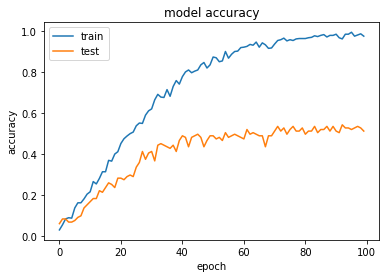

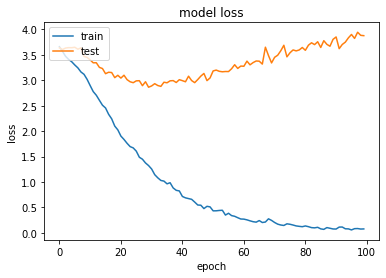

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# train set acc: 97%, test set acc: 51%, there is overfitting over the training set.